### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
from numpy import expand_dims ,zeros, ones, vstack
from numpy.random import randn
from numpy.random import randint
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2D, LeakyReLU, Dropout, Input, BatchNormalization
from tensorflow.keras.initializers import he_normal, he_uniform, glorot_normal
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Importing Data

In [3]:
data = pd.read_csv('dont-overfit-ii/train.csv')
# taking only the minority class(class 0) data points to train the GAN
dataset = data[data.target == 0].drop(['target', 'id'],axis = 1)
print(dataset.shape)

(90, 300)


### Discriminator Model

In [4]:
def define_discriminator(in_shape=(300)):
    '''
    This method returns a discriminator model for the GAN.
    ----------------------
    Parameter
    in_shape : Input data shape for the discriminator model(compiled).
    ----------------------
    Return Value
    model: The discriminator model.
    
    '''
        
    input_layer = Input(shape= (in_shape,), name = 'input')
    layer = Dense(128, activation = 'LeakyReLU', kernel_initializer= he_uniform, name = 'dense_1')(input_layer)
    layer = Dense(32, activation = 'LeakyReLU', kernel_initializer= he_uniform, name = 'dense_3')(layer)
    output = Dense(1, activation='sigmoid', kernel_initializer= glorot_normal, name = 'output')(layer)
    # compile model
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model = Model(inputs = input_layer, outputs = output, name = 'Discriminator')
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

Model: "Discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 300)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               38528     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
output (Dense)               (None, 1)                 33        
Total params: 42,689
Trainable params: 42,689
Non-trainable params: 0
_________________________________________________________________


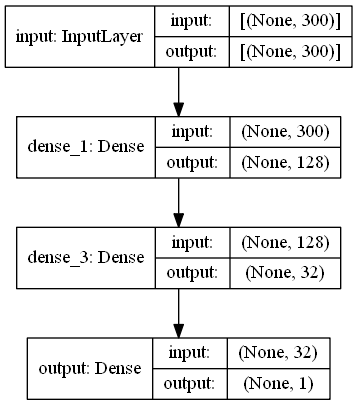

In [5]:
discriminator = define_discriminator()
discriminator.summary()
plot_model(discriminator, show_shapes= True)

### Generator Model

In [7]:
# define the standalone generator model
def define_generator(latent_dim):
    '''
    This method returns a generator model for the GAN.
    ----------------------
    Parameter
    latent_dim : Input data shape for the generator model(uncompiled).
    ----------------------
    Return Value
    model: The generator model.
    
    '''
    input_layer = Input(shape= (latent_dim,), name = 'input')
    layer = Dense(128, activation = 'LeakyReLU', kernel_initializer= he_uniform, name = 'dense_1')(input_layer)
    layer = Dense(164, activation = 'LeakyReLU', kernel_initializer= he_uniform, name = 'dense_2')(layer)    
    layer = Dense(196, activation = 'LeakyReLU', kernel_initializer= he_uniform, name = 'dense_3')(layer)
    layer = Dense(256, activation = 'LeakyReLU', kernel_initializer= he_uniform, name = 'dense_4')(layer)
    layer = Dense(300, activation = 'LeakyReLU', kernel_initializer= he_uniform, name = 'dense_5')(layer)
    output = Dense(300, activation='linear', kernel_initializer= he_uniform, name = 'output')(layer)
    model = Model(inputs = input_layer, outputs = output, name = 'Generator')
    return model

Model: "Generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 100)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               12928     
_________________________________________________________________
dense_2 (Dense)              (None, 164)               21156     
_________________________________________________________________
dense_3 (Dense)              (None, 196)               32340     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               50432     
_________________________________________________________________
dense_5 (Dense)              (None, 300)               77100     
_________________________________________________________________
output (Dense)               (None, 300)               90

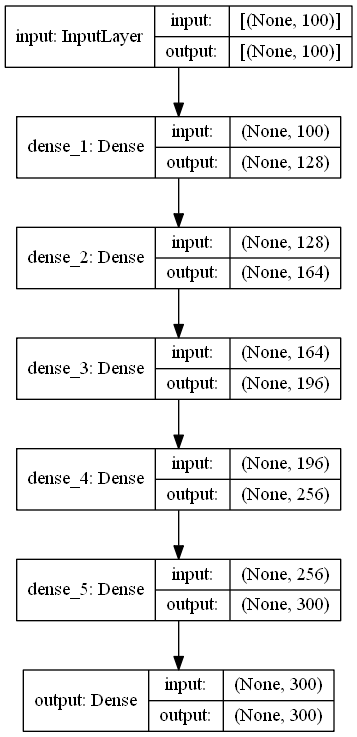

In [8]:
latent_dim = 100
generator = define_generator(latent_dim)
generator.summary()
plot_model(generator, show_shapes= True)

### GAN Model

In [9]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
    '''
    This method returns a GAN model.
    ----------------------
    Parameter
    generator     : Generator model for the GAN model.
    
    discriminator : Discriminator model for the GAN model.
    ----------------------
    Return Value
    model: The GAN model.
    
    '''
    discriminator.trainable = False  
    gan_output = discriminator(generator.output)  
    
    #Initialize gan
    model = Model(inputs = generator.input, outputs = gan_output, name = 'GAN')  

    #Model Compilation
    model.compile(loss = "binary_crossentropy", optimizer = Adam(lr=0.00001))  
    return model

Model: "GAN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 100)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               12928     
_________________________________________________________________
dense_2 (Dense)              (None, 164)               21156     
_________________________________________________________________
dense_3 (Dense)              (None, 196)               32340     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               50432     
_________________________________________________________________
dense_5 (Dense)              (None, 300)               77100     
_________________________________________________________________
output (Dense)               (None, 300)               90300   

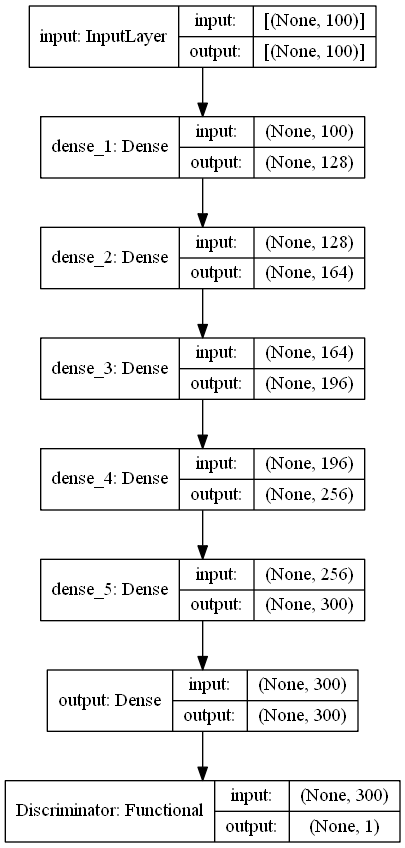

In [10]:
gan = define_gan(generator, discriminator)
gan.summary()
plot_model(gan, show_shapes= True)

### Training GAN

Epoch: 200	--> [Discriminator_loss: 0.018228] [GAN_loss: 4.898708]
Epoch: 400	--> [Discriminator_loss: 0.085585] [GAN_loss: 3.436237]
Epoch: 600	--> [Discriminator_loss: 0.070916] [GAN_loss: 3.788004]
Epoch: 800	--> [Discriminator_loss: 0.024717] [GAN_loss: 5.363601]
Epoch: 1000	--> [Discriminator_loss: 0.007041] [GAN_loss: 5.477995]
Epoch: 1200	--> [Discriminator_loss: 0.003662] [GAN_loss: 6.158337]
Epoch: 1400	--> [Discriminator_loss: 0.004178] [GAN_loss: 6.385890]
Epoch: 1600	--> [Discriminator_loss: 0.003743] [GAN_loss: 6.687416]
Epoch: 1800	--> [Discriminator_loss: 0.003707] [GAN_loss: 6.325284]
Epoch: 2000	--> [Discriminator_loss: 0.005102] [GAN_loss: 6.179289]
Epoch: 2200	--> [Discriminator_loss: 0.003292] [GAN_loss: 6.513342]
Epoch: 2400	--> [Discriminator_loss: 0.002570] [GAN_loss: 7.083690]
Epoch: 2600	--> [Discriminator_loss: 0.002352] [GAN_loss: 7.977558]
Epoch: 2800	--> [Discriminator_loss: 0.001111] [GAN_loss: 7.984212]
Epoch: 3000	--> [Discriminator_loss: 0.001032] [GAN_

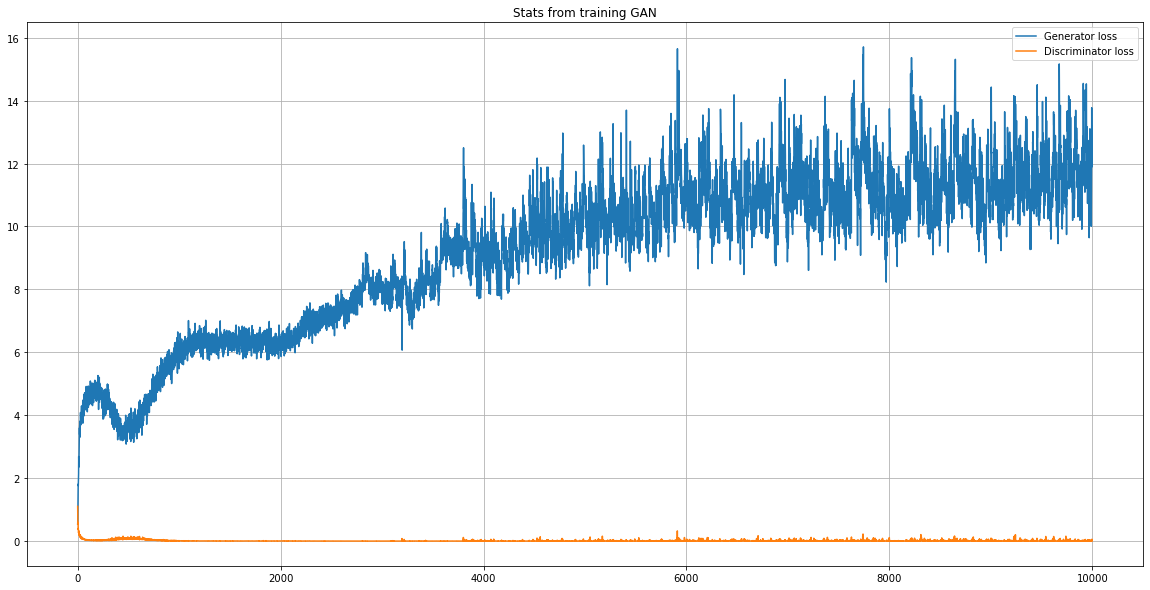

In [11]:
#Referance: https://www.analyticsvidhya.com/blog/2020/10/lets-improve-the-model-accuracy-of-imbalanced-covid-19-mortality-prediction-using-generative-adversarial-networks-gan-based-oversampling-technique/
#Referance: https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-an-mnist-handwritten-digits-from-scratch-in-keras/
def gan_train(gan, generator, discriminator, dataset, latent_dim, n_epochs, n_batch, n_eval):
    '''
    This method trains the GAN on the given dataset and prints the logloss of the discriminator and generator models.
    ----------------------
    Parameter
    gan           : GAN model for training the data.
    
    generator     : Generator model to generate data points.
    
    discriminator : Discriminator model to predict the class.
    
    dataset       : Dataset to train the GAN model on.
    
    latent_dim    : Input dimension for the generator model.
    
    n_epochs      : No of epochs to train the GAN.
    
    n_batch       : No of datapoints per batch.
    
    n_eval        : Frequency with which the trained model's performance is printed.
    ----------------------
    Return Value
    None
    '''
    
    half_batch = int(n_batch / 2)  
    discriminator_loss = []  
    gan_loss = []
    
    #generate class labels for fake and real datapoints
    valid = np.ones((half_batch, 1))  
    y_gan = np.ones((n_batch, 1))  
    fake = np.zeros((half_batch, 1))  

    #training
    for i in range(n_epochs):  
        #select random batch from datapoints
        idx = np.random.randint(0, dataset.shape[0], half_batch)  
        real_data = dataset.iloc[idx,:]
  
        #generate fake samples from the noise
        noise = np.random.normal(0, 1, (half_batch, latent_dim))  
        fake_data = generator.predict(noise)  
     
        #train the discriminator and return losses and acc
        d_loss_real, da_real = discriminator.train_on_batch(real_data, valid)  
        d_loss_fake, da_fake = discriminator.train_on_batch(fake_data, fake)  
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)  
        discriminator_loss.append(d_loss)  
       
        #generate noise for generator input and train the generator (to have the discriminator label samples as valid)
        noise = np.random.normal(0, 1, (n_batch, latent_dim))  
        g_loss = gan.train_on_batch(noise, y_gan)  
        gan_loss.append(g_loss)

        #evaluate progress
        if (i+1) % n_eval == 0:  
            print ("Epoch: %d\t--> [Discriminator_loss: %f] [GAN_loss: %f]" % (i + 1, d_loss, g_loss))  
            
    plt.figure(figsize = (20, 10))  
    plt.plot(gan_loss, label = "Generator loss")  
    plt.plot(discriminator_loss, label = "Discriminator loss")     
    plt.title("Stats from training GAN")  
    plt.grid()
    plt.legend()

gan_train(gan, generator, discriminator, dataset, latent_dim = 100, n_epochs = 10000, n_batch = 60, n_eval = 200)

### Generating data

In [12]:
#generating data using the trained generator
noise = np.random.normal(0, 1, (181, 100)) 
x_fake = generator.predict(noise)
generate_data = pd.DataFrame(x_fake)
generate_data

0         1         2         3         4         5         6    \
0   -1.231536 -0.757058  0.323471 -0.373336  1.740396 -0.011642  0.787421   
1    0.527475 -2.009773  0.031520 -0.722841  1.272380  0.217252  0.162855   
2    1.433272 -1.541269  0.154739  1.055611 -1.003305  1.193709 -0.841651   
3    1.243422 -3.354105  1.253618 -1.147332  0.882893  1.536356 -0.517656   
4   -0.522224  1.797188  1.197893  0.610273  0.527629  0.310325 -0.688651   
..        ...       ...       ...       ...       ...       ...       ...   
176 -2.124128  0.405036  0.221787 -1.100904  2.740901  0.826122  1.344687   
177 -0.738197 -0.814411  2.704579 -0.437952  0.984169 -0.098871  0.145119   
178  1.926204 -2.239471 -0.529206 -1.306862 -0.288111  0.499006  0.633132   
179  2.774865 -1.580524 -0.220344 -2.936759  1.112859 -0.326763 -1.337632   
180 -0.567688 -0.570253  0.514441  1.194271  2.461060 -2.035131  1.603305   

          7         8         9    ...       290       291       292  \
0   -0.554207 -1.111556 -1.101804  ... -1.539691  0.437288 -0.864773   
1   -0.504717  0.036916 -0.363956  ...  0.066485  0.971897  0.824495   
2    1.394856  2.288121  1.210096  ... -0.187716 -1.260288  0.528304   
3   -0.093137 -0.115199 -1.654826  ...  1.827667  1.577451  2.854554   
4   -2.323620 -1.153003  0.520274  ...  2.061646  0.202365 -0.287820   
..        ...       ...       ...  ...       ...       ...       ...   
176 -0.337886 -1.193999 -3.253947  ...  0.025036  0.600713  0.208316   
177  0.387999 -0.788392 -1.045667  ... -0.446112 -0.758467 -2.876693   
178 -1.568048  0.912831 -0.157988  ...  1.490367  1.116894  1.565116   
179 -1.818586 -0.433604 -0.924282  ... -0.528094  0.142860  1.301418   
180  0.071786  1.939684 -0.438677  ... -0.566764 -1.958286 -1.424771   

          293       294       295       296       297       298       299  
0   -2.047273 -1.318439 -0.535834 -0.242430 -1.270979  0.167726  0.890323  
1   -0.193334 -0.845217  0.024121 -0.044567 -0.401558 -0.315309  0.729277  
2    0.343590 -0.593913 -0.219812  0.704353 -1.886140  1.295608 -0.353314  
3    0.378508  0.476267 -0.366529  0.693955 -0.849632 -0.833875  0.253276  
4    1.410335 -0.582540  0.138703 -1.518092  0.356950 -0.116612  0.742705  
..        ...       ...       ...       ...       ...       ...       ...  
176 -0.197595  1.476042 -0.986735  0.611642  0.091400 -0.861588  1.382062  
177  1.000746 -0.523397 -0.683659  0.869735  0.547007  0.553762 -1.778071  
178  2.473838  0.577597 -0.387297 -1.419720 -1.121611 -0.642613  0.302140  
179  0.707005  0.757709  1.041660 -1.178949 -1.898698 -1.873588 -0.140372  
180 -1.093924 -0.206927  0.549552  1.800646  2.016586  2.067118 -0.184697  

[181 rows x 300 columns]

## Plotting comparison between generated and the original data

### Max value of generated vs original data points

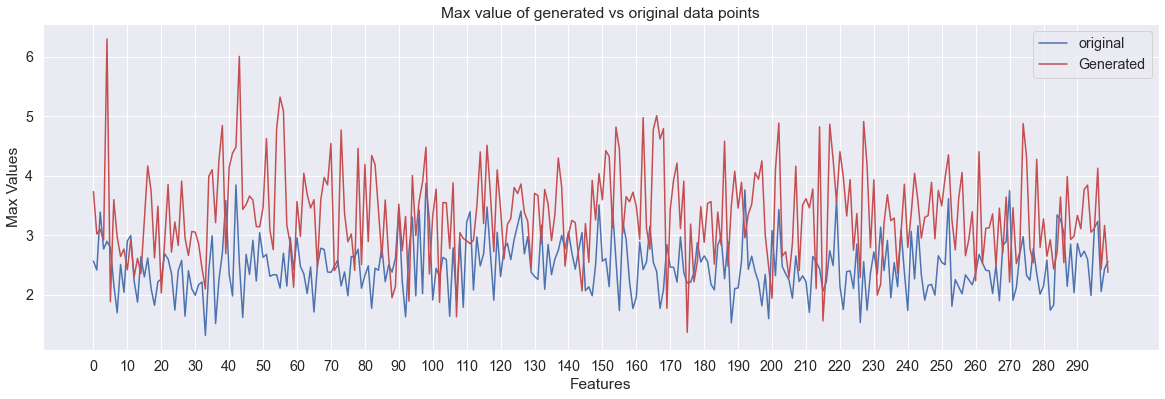

In [13]:
sns.set(font_scale=1.3)
plt.figure(figsize=(20,6))
plt.plot(dataset.describe().loc['max','0':],'b', label = 'original')
plt.plot(generate_data.describe().loc['max'],'r', label = 'Generated')
plt.title('Max value of generated vs original data points')
plt.legend(loc = "upper right")
plt.xlabel('Features')
plt.ylabel('Max Values')
plt.xticks(range(0,300,10))
plt.show()

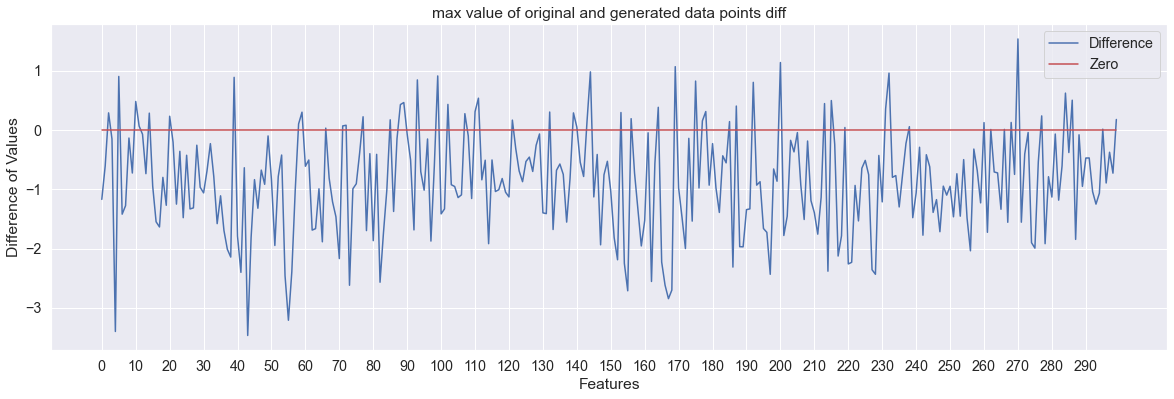

In [14]:
#plotting the difference between the generated and original features max value
col = 'max'
sns.set(font_scale=1.3)
plt.figure(figsize=(20,6))
plt.plot(dataset.describe().loc[col,'0':].values - generate_data.describe().loc[col].values,'b', label = 'Difference')
plt.plot([0]*300,'r', label = 'Zero')
plt.title(col+' value of original and generated data points diff')
plt.legend(loc = "upper right")
plt.xlabel('Features')
plt.ylabel('Difference of Values')
plt.xticks(range(0,300,10))
plt.show()

### Min value of generated vs original data points

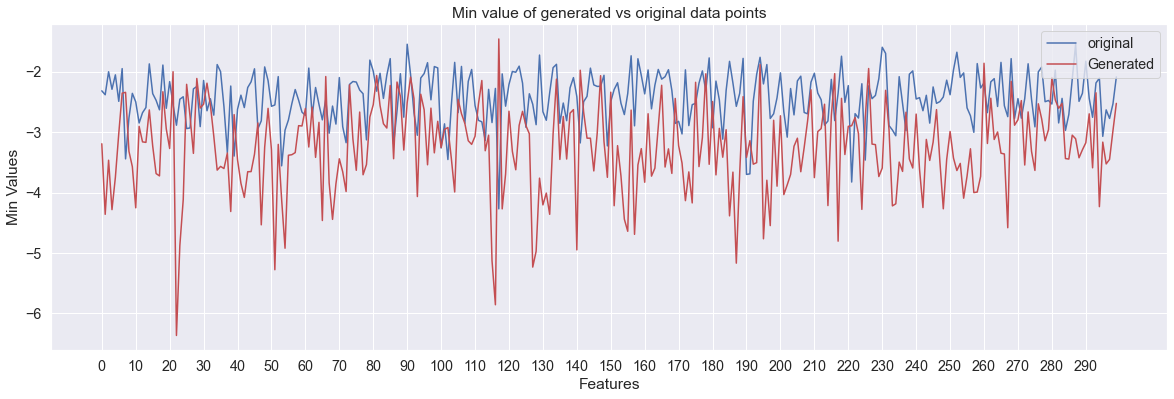

In [15]:
sns.set(font_scale=1.3)
plt.figure(figsize=(20,6))
plt.plot(dataset.describe().loc['min','0':],'b', label = 'original')
plt.plot(generate_data.describe().loc['min'],'r', label = 'Generated')
plt.title('Min value of generated vs original data points')
plt.legend(loc = "upper right")
plt.xlabel('Features')
plt.ylabel('Min Values')
plt.xticks(range(0,300,10))
plt.show()

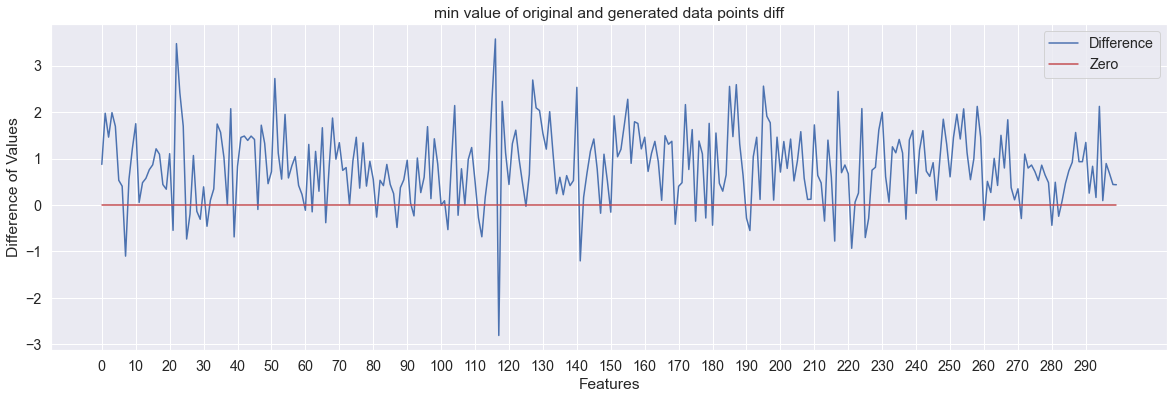

In [16]:
#plotting the difference between the generated and original features min value
col = 'min'
sns.set(font_scale=1.3)
plt.figure(figsize=(20,6))
plt.plot(dataset.describe().loc[col,'0':].values - generate_data.describe().loc[col].values,'b', label = 'Difference')
plt.plot([0]*300,'r', label = 'Zero')
plt.title(col+' value of original and generated data points diff')
plt.legend(loc = "upper right")
plt.xlabel('Features')
plt.ylabel('Difference of Values')
plt.xticks(range(0,300,10))
plt.show()

### Mean value of generated vs original data points

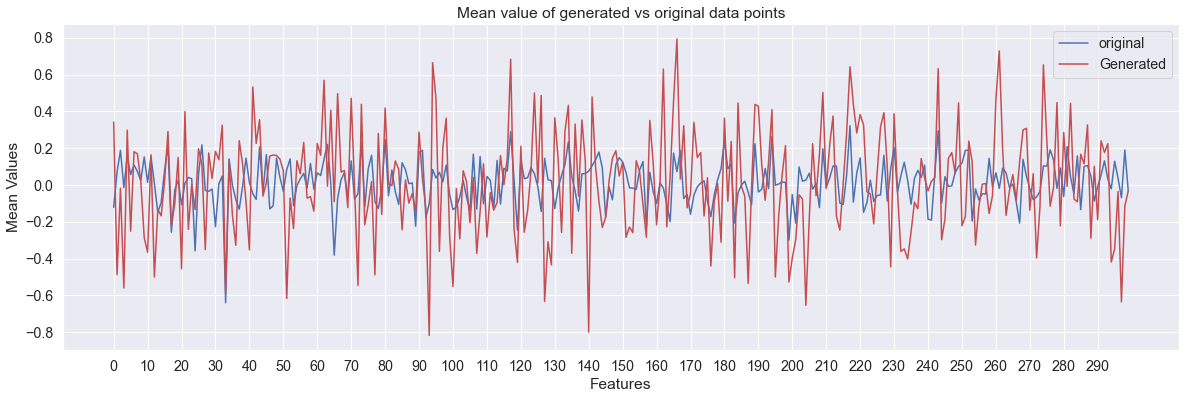

In [17]:
sns.set(font_scale=1.3)
plt.figure(figsize=(20,6))
plt.plot(dataset.describe().loc['mean','0':],'b', label = 'original')
plt.plot(generate_data.describe().loc['mean'],'r', label = 'Generated')
plt.title('Mean value of generated vs original data points')
plt.legend(loc = "upper right")
plt.xlabel('Features')
plt.ylabel('Mean Values')
plt.xticks(range(0,300,10))
plt.show()

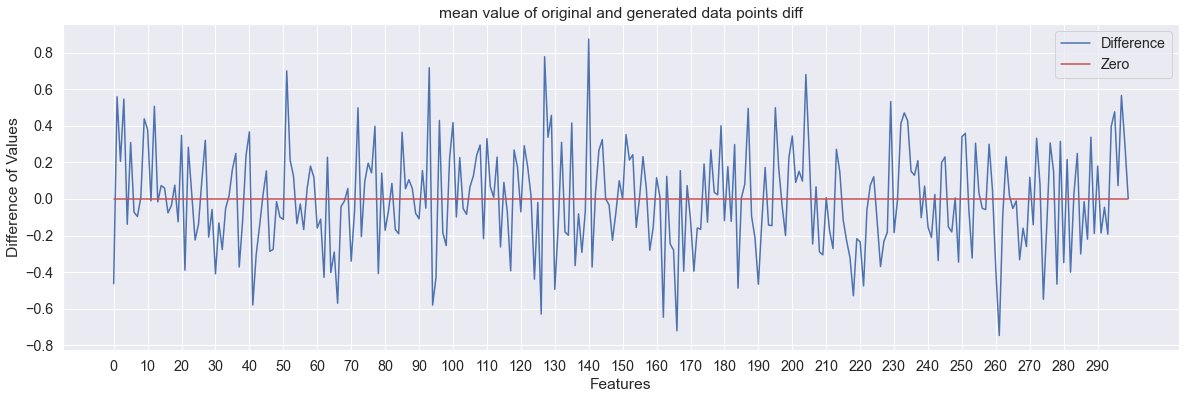

In [18]:
#plotting the difference between the generated and original features mean value
col = 'mean'
sns.set(font_scale=1.3)
plt.figure(figsize=(20,6))
plt.plot(dataset.describe().loc[col,'0':].values - generate_data.describe().loc[col].values,'b', label = 'Difference')
plt.plot([0]*300,'r', label = 'Zero')
plt.title(col+' value of original and generated data points diff')
plt.legend(loc = "upper right")
plt.xlabel('Features')
plt.ylabel('Difference of Values')
plt.xticks(range(0,300,10))
plt.show()

### Std value of generated vs original data points

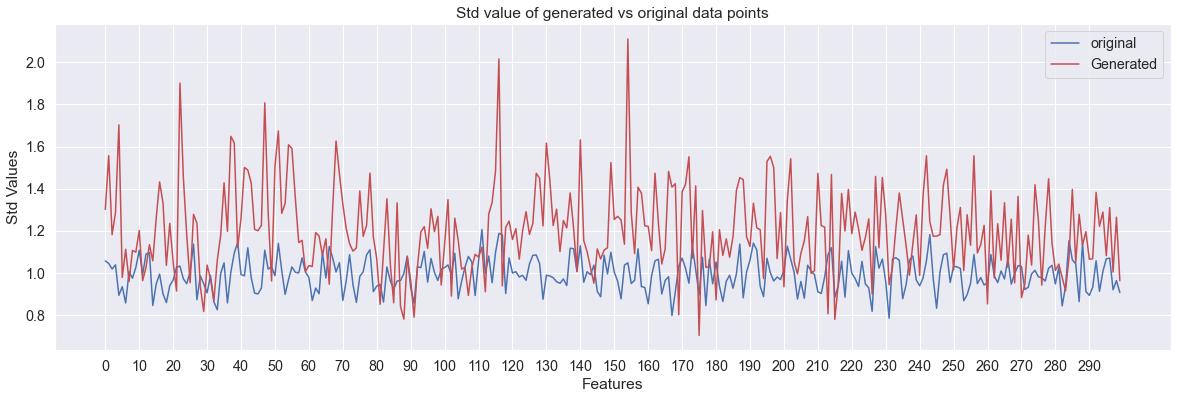

In [19]:
sns.set(font_scale=1.3)
plt.figure(figsize=(20,6))
plt.plot(dataset.describe().loc['std','0':],'b', label = 'original')
plt.plot(generate_data.describe().loc['std'],'r', label = 'Generated')
plt.title('Std value of generated vs original data points')
plt.legend(loc = "upper right")
plt.xlabel('Features')
plt.ylabel('Std Values')
plt.xticks(range(0,300,10))
plt.show()

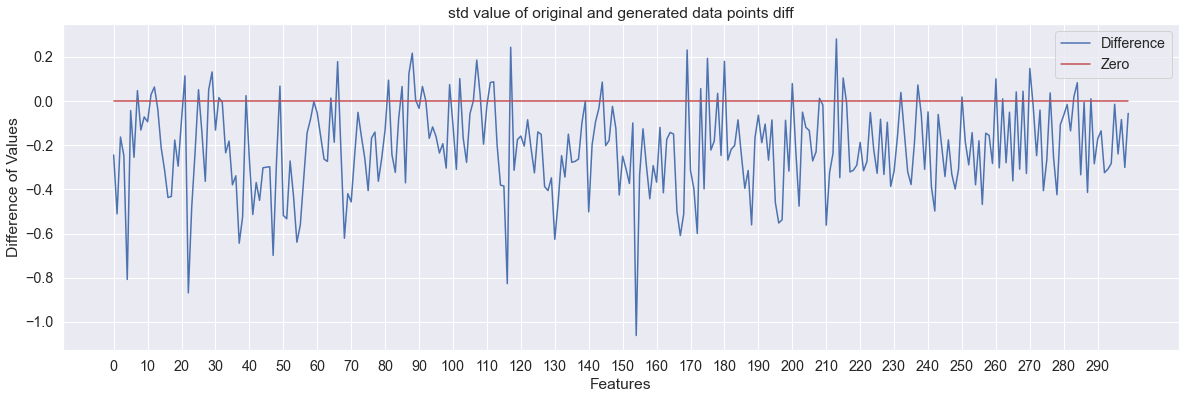

In [20]:
col = 'std'
sns.set(font_scale=1.3)
plt.figure(figsize=(20,6))
plt.plot(dataset.describe().loc[col,'0':].values - generate_data.describe().loc[col].values,'b', label = 'Difference')
plt.plot([0]*300,'r', label = 'Zero')
plt.title(col+' value of original and generated data points diff')
plt.legend(loc = "upper right")
plt.xlabel('Features')
plt.ylabel('Difference of Values')
plt.xticks(range(0,300,10))
plt.show()

### Checking if the generated and the original data follows the same distribution using ks-test

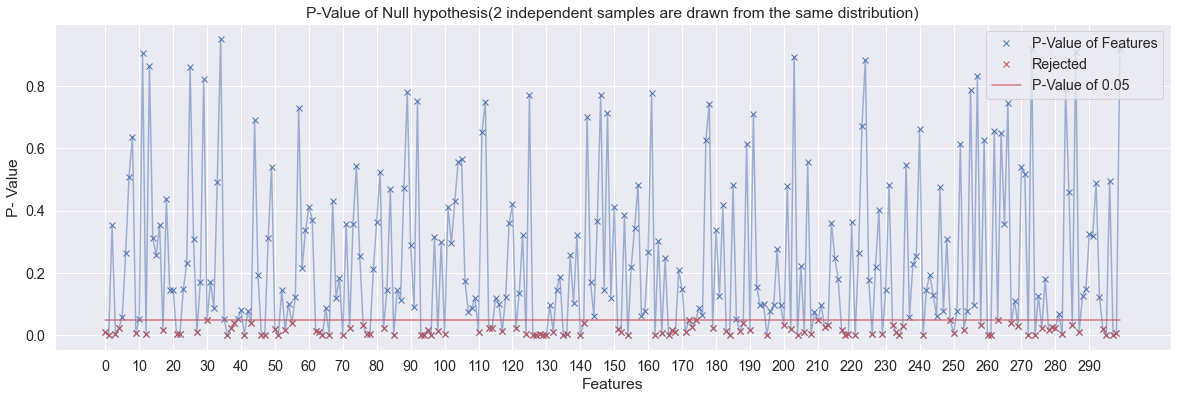

No of Features that are not from same dist:  115
No of Features that are likely to be from same dist:  185


In [21]:
#finding if the generated and the original data distribution matches or not using ks test
ks_2samp_results = []
for i in dataset.columns:
    ks_2samp_results.append(stats.ks_2samp(dataset[i], generate_data[int(i)]))
    
#Setting font size
sns.set(font_scale=1.3)
plt.figure(figsize=(20,6))

ks_2sam_p_val = np.array(ks_2samp_results)[:,1]


#plotting the p-value of the null hypothesis(2 independent samples are drawn from the same distribution) for all features
plt.plot(ks_2sam_p_val,'xb', label = 'P-Value of Features')
plt.plot(ks_2sam_p_val,'b', alpha = 0.5)

#taking the features that got p-value less that 0.05 and plotting it
rejected  = np.array([[i,p]for i,p in enumerate(ks_2sam_p_val) if p < 0.05])
plt.plot(rejected[:,0], rejected[:,1],'xr', label = 'Rejected')

plt.plot([0.05]*300,'r', label = 'P-Value of 0.05', alpha = 0.7)

plt.title('P-Value of Null hypothesis(2 independent samples are drawn from the same distribution)')
plt.legend(loc = "upper right")
plt.xlabel('Features')
plt.ylabel('P- Value')
plt.xticks(range(0,300,10))
plt.show()

print('No of Features that are not from same dist: ',rejected.shape[0])
print('No of Features that are likely to be from same dist: ',ks_2sam_p_val.shape[0] - rejected.shape[0])

In [22]:
# finding the features that have p-value more that 0.05
index = np.array([])
not_rejected = np.array([[int(i),p] for i,p in enumerate(ks_2sam_p_val) if not p < 0.05])
if(len(not_rejected)> 0):
    index = not_rejected[:,0].astype(int)
index

array([  2,   5,   6,   7,   8,  10,  11,  13,  14,  15,  16,  18,  19,
        20,  23,  24,  25,  26,  28,  29,  31,  32,  33,  34,  35,  39,
        40,  42,  44,  45,  48,  49,  52,  54,  56,  57,  58,  59,  60,
        61,  65,  67,  68,  69,  71,  73,  74,  75,  79,  80,  81,  83,
        84,  86,  87,  88,  89,  90,  91,  92,  97,  99, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 111, 112, 115, 116, 118, 119, 120,
       122, 123, 125, 131, 133, 134, 137, 138, 139, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 153, 155, 156, 157, 158, 159, 160, 161,
       163, 165, 169, 170, 175, 176, 177, 178, 180, 181, 182, 185, 186,
       189, 191, 192, 193, 194, 196, 197, 198, 199, 201, 203, 205, 207,
       209, 211, 214, 215, 216, 220, 222, 223, 224, 225, 227, 228, 230,
       231, 236, 237, 238, 239, 240, 242, 243, 244, 245, 246, 247, 248,
       251, 252, 254, 255, 256, 257, 259, 262, 264, 265, 266, 268, 270,
       271, 273, 275, 277, 281, 283, 284, 286, 288, 289, 290, 29

### Plotting the PDF of the generated and the original data

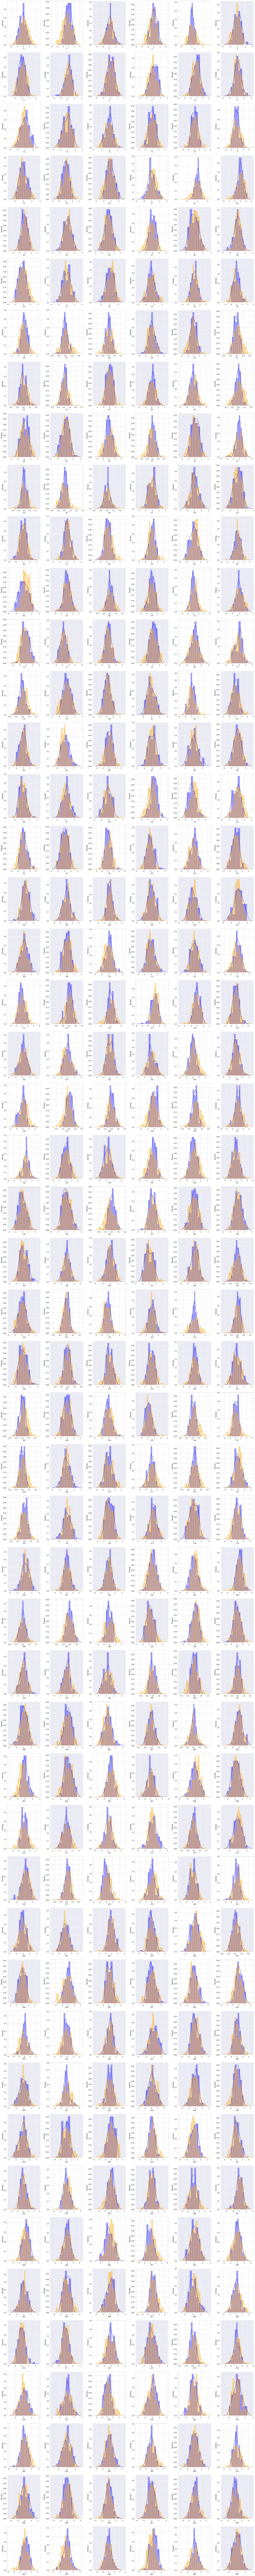

In [23]:
plt.figure(figsize=(30,300))
for col in data.columns[2:]:
    
    if(len(index)>0 and int(col) in index):
        sns.set_style('darkgrid') #for the features where the dist of generated and original data is likely to be same
    else:
        sns.set_style('whitegrid') #for the features where the dist of generated and original data is not same
            
    plt.subplot(50,6,int(col)+1)
    
    sns.distplot(dataset[col], label = 'Orignal ', color='blue')
    sns.distplot(generate_data[int(col)], label = 'Generated', color='orange')
plt.tight_layout()
plt.show()

#### Saving The Generated Data

In [24]:
generate_data.to_csv('gan_generate_data.csv',index=False)